# Caramel Moisture Equivalency
<hr style="border:3px solid gray"> </hr>

## Project Objective & Deliverables
Identify the relationship between caramel moisture in the Kitchen and Alpha Caramel Depositor to determine an optimial caramel KPI.<br>
Identify the relationship between caramel moisture in the Kitchen and Alpha Caramel Depositor. <br>
Quantitatively fortify the preposition to pivot our caramel KPI to viscosity to increase performance.
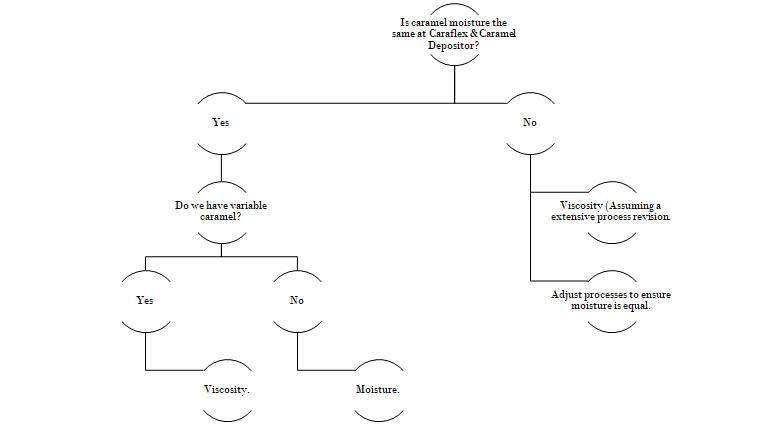
## Defining Constraints
Batch and melt caramel yield different characteristics; therefore, the study primarly focuses on batched caramel, but entertains melt characteristics. The conclusions should be treated mutually exclusively.
<hr style="border:2px solid gray"> </hr>

## Key Take Aways
<ol>
    <li>Caramel moisture is equal between the Caraflex (Kitchen) and the Caramel Depositor.</li>
    <li>The Caramel Depositor has a slightly higher moisture relative to the Kitchen; therefore, there is a leak in our system.</li>
    <li>More samples are required to consistently adjust for the leak.</li>
    <li>Pivot to identify the relationship between Kitchen setpoints and viscosity readings because caramel moisture is a sunk cost. We understand viscosity is a better KPI than moisture; therefore, we should pursue understanding viscosity implications.</li>
</ol>

<hr style="border:2px solid gray"> </hr>

## Analysis

In [1]:
# Import pertinent modules.
from statsmodels.stats.weightstats import DescrStatsW as smstat
from scipy.stats import shapiro
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data and declare variable types.
base_data = pd.read_excel('2020_07_20_War on Waste_Caramel Moisture Equivalency.xlsx','Batch_Data')
base_data = base_data.astype({'Caraflex Average Moisture': float, 'Depositor Average Moisture': float})
base_data['Difference'] = base_data['Caraflex Average Moisture'] - base_data['Depositor Average Moisture']

In [3]:
# Describe Results
base_data[['Caraflex Average Moisture', 'Depositor Average Moisture','Difference']].describe()

,Caraflex Average Moisture,Depositor Average Moisture,Difference
count,35.000000,35.000000,35.000000
mean,11.415143,11.453143,-0.038000
std,0.233558,0.263949,0.243066
min,10.900000,10.810000,-0.530000
25%,11.325000,11.325000,-0.205000
50%,11.420000,11.500000,-0.010000
75%,11.540000,11.645000,0.120000
max,11.960000,11.850000,0.390000


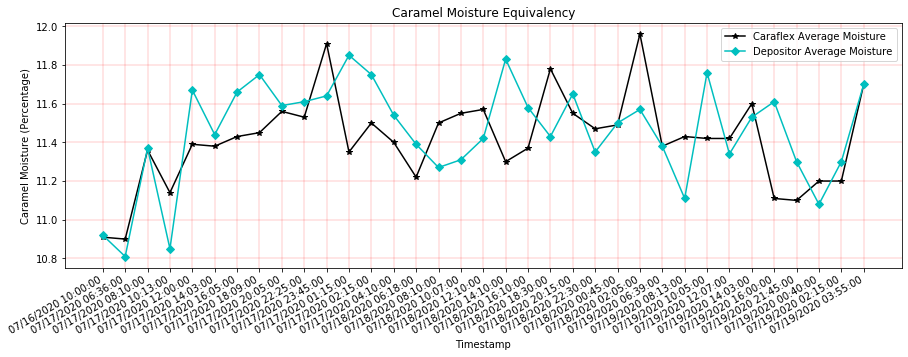

In [4]:
# Define figure size.
fig = plt.figure(figsize=(15, 5))
# Plot variables, color, and marker.
plt.plot(base_data['Timestamp'],
         base_data['Caraflex Average Moisture'],
         color='k',
         marker='*',
         label='Caraflex Average Moisture')
plt.plot(base_data['Timestamp'],
         base_data['Depositor Average Moisture'],
         color='c',
         marker='D',
         label='Depositor Average Moisture')
# Plot title and axises labels.
plt.title('Caramel Moisture Equivalency')
plt.xlabel('Timestamp')
plt.ylabel('Caramel Moisture (Percentage)')
plt.legend()
# Plot format date as x-axis.
plt.gcf().autofmt_xdate()
# Plot watermark grid lines.
plt.grid(color='r',linestyle='-',linewidth=0.2)
plt.show()

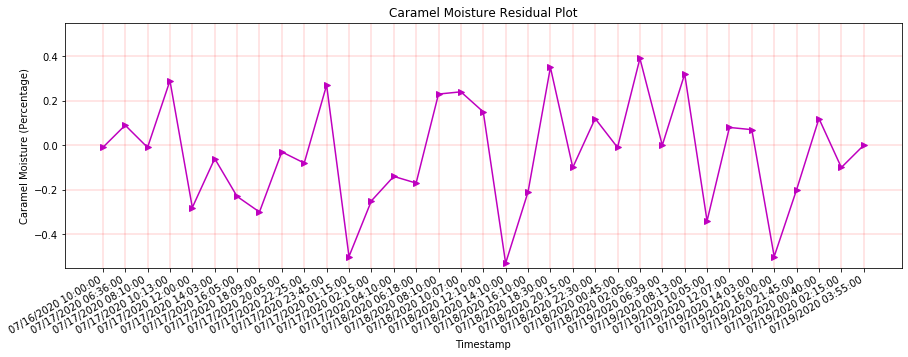

In [5]:
# Define figure size.
fig = plt.figure(figsize=(15, 5))
# Plot variables, color, and marker.
plt.plot(base_data['Timestamp'],
         base_data['Difference'],
         color='m',
         marker='>',
         label='Difference')
# Plot title and axises labels.
plt.title('Caramel Moisture Residual Plot')
plt.xlabel('Timestamp')
plt.ylabel('Caramel Moisture (Percentage)')
# Plot format date as x-axis.
plt.gcf().autofmt_xdate()
fig.gca().set_ylim([-0.55,0.55])
# Plot watermark grid lines.
plt.grid(color='r',linestyle='-',linewidth=0.2)
plt.show()

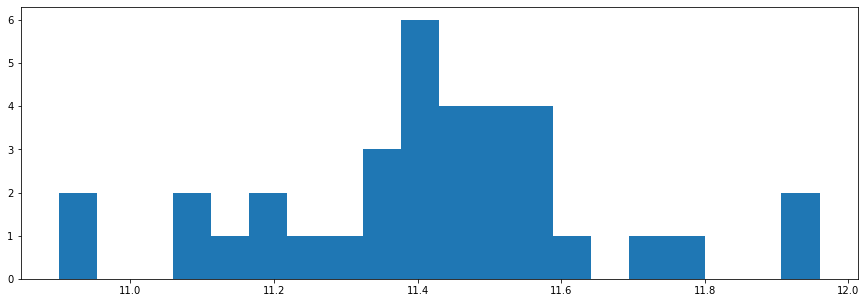

Caraflex Average Moisture is normally distributed. The p-value is 0.3194.


In [6]:
fig = plt.figure(figsize=(15, 5))
plt.hist(base_data['Caraflex Average Moisture'],bins=20)
plt.show()

caraflex_normality_p = round(shapiro(base_data['Caraflex Average Moisture'])[1],4)
depositor_normality_p = round(shapiro(base_data['Depositor Average Moisture'])[1],4)

if caraflex_normality_p < 0.05:
    print('Caraflex Average Moisture is nonparametric -- YOU NEED MORE SAMPLES. The p-value is ' 
          + str(caraflex_normality_p) + '.')
else:
    print('Caraflex Average Moisture is normally distributed. The p-value is ' 
          + str(caraflex_normality_p) + '.')

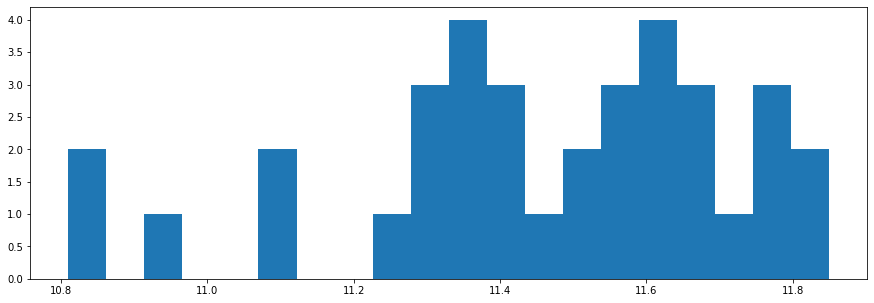

Depositor Average Moisture is nonparametric-- YOU NEED MORE SAMPLES. The p-value is 0.0451.


In [7]:
fig = plt.figure(figsize=(15, 5))
plt.hist(base_data['Depositor Average Moisture'], bins = 20)
plt.show()

if depositor_normality_p < 0.05:
    print('Depositor Average Moisture is nonparametric-- YOU NEED MORE SAMPLES. The p-value is '
          + str(depositor_normality_p) + '.')
else:
    print('Depositor Average Moisture is normally distributed. The p-value is ' 
          + str(depositor_normality_p) + '.')

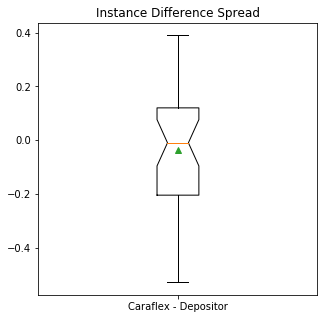

In [8]:
fig = plt.figure(figsize=(5, 5))

plt.boxplot(base_data['Difference'],
                showmeans=True,
                labels=['Caraflex - Depositor'],
                notch=True,)
plt.title('Instance Difference Spread')
plt.show()

In [9]:
difference_p = round(smstat(base_data['Difference']).ttest_mean(0)[1],4)

if difference_p < 0.05:
    print('Caramel moisture is unequal in the Kitchen and at the depositor. We should continue to observe caramel moisture \
discrepancies. The p-value is ' + str(difference_p) + '.')
else:
    print('Caramel moisture is equal in the Kitchen and at the depositor. We should pivot to measuring caramel viscosity \
because operators are observing variable caramel although it is within spec. The p-value is ' + str(difference_p) + '.')

Caramel moisture is equal in the Kitchen and at the depositor. We should pivot to measuring caramel viscosity because operators are observing variable caramel although it is within spec. The p-value is 0.3615.


<hr style="border:2px solid gray"> </hr>

## Melt Investigation

In [10]:
# Load data and declare variable types.
base_data = pd.read_excel('2020_07_20_War on Waste_Caramel Moisture Equivalency.xlsx','Melt_Data')
base_data = base_data.astype({'Melt Average Moisture': float, 'Depositor Average Moisture': float})
base_data['Difference'] = base_data['Melt Average Moisture'] - base_data['Depositor Average Moisture']

In [11]:
# Describe Results
base_data[['Melt Average Moisture', 'Depositor Average Moisture','Difference']].describe()

,Melt Average Moisture,Depositor Average Moisture,Difference
count,14.000000,14.000000,14.000000
mean,11.633571,11.608571,0.025000
std,0.334757,0.228553,0.262774
min,11.145000,11.215000,-0.310000
25%,11.458750,11.421250,-0.165000
50%,11.552500,11.697500,-0.060000
75%,11.760833,11.728750,0.256250
max,12.400000,12.025000,0.450000


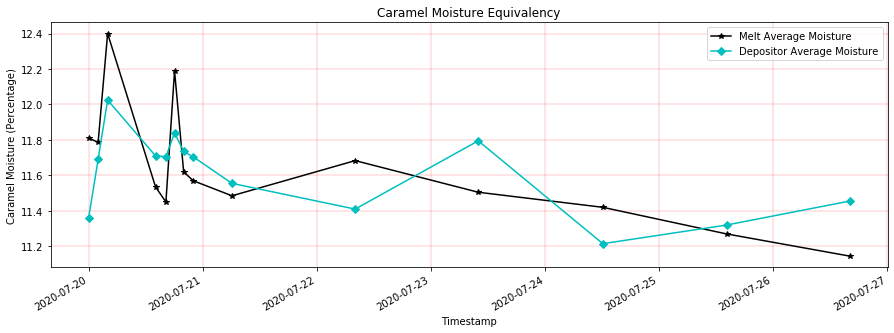

In [12]:
# Define figure size.
fig = plt.figure(figsize=(15, 5))
# Plot variables, color, and marker.
plt.plot(base_data['Timestamp'],
         base_data['Melt Average Moisture'],
         color='k',
         marker='*',
         label='Melt Average Moisture')
plt.plot(base_data['Timestamp'],
         base_data['Depositor Average Moisture'],
         color='c',
         marker='D',
         label='Depositor Average Moisture')
# Plot title and axises labels.
plt.title('Caramel Moisture Equivalency')
plt.xlabel('Timestamp')
plt.ylabel('Caramel Moisture (Percentage)')
plt.legend()
# Plot format date as x-axis.
plt.gcf().autofmt_xdate()
# Plot watermark grid lines.
plt.grid(color='r',linestyle='-',linewidth=0.2)
plt.show()

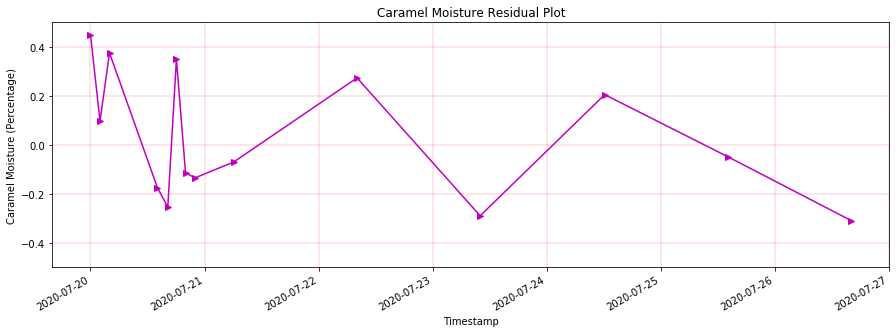

In [13]:
# Define figure size.
fig = plt.figure(figsize=(15, 5))
# Plot variables, color, and marker.
plt.plot(base_data['Timestamp'],
         base_data['Difference'],
         color='m',
         marker='>',
         label='Difference')
# Plot title and axises labels.
plt.title('Caramel Moisture Residual Plot')
plt.xlabel('Timestamp')
plt.ylabel('Caramel Moisture (Percentage)')
# Plot format date as x-axis.
plt.gcf().autofmt_xdate()
fig.gca().set_ylim([-0.5,0.5])
# Plot watermark grid lines.
plt.grid(color='r',linestyle='-',linewidth=0.2)
plt.show()

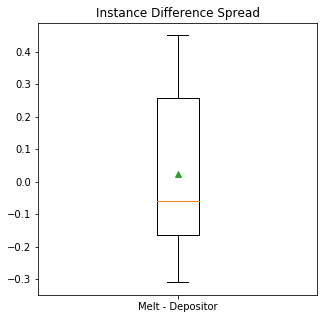

In [14]:
fig = plt.figure(figsize=(5, 5))

plt.boxplot(base_data['Difference'],
                showmeans=True,
                labels=['Melt - Depositor'])
plt.title('Instance Difference Spread')
plt.show()

In [15]:
difference_p = round(smstat(base_data['Difference']).ttest_mean(0)[1],4)

if difference_p < 0.05:
    print('Caramel moisture is unequal in the Kitchen and at the depositor. We should continue to observe caramel moisture \
discrepancies. The p-value is ' + str(difference_p) + '.')
else:
    print('Caramel moisture is equal in the Kitchen and at the depositor. We should pivot to measuring caramel viscosity \
because operators are observing variable caramel although it is within spec. The p-value is ' + str(difference_p) + '.')

Caramel moisture is equal in the Kitchen and at the depositor. We should pivot to measuring caramel viscosity because operators are observing variable caramel although it is within spec. The p-value is 0.7276.
